In [2]:
!pip list | grep torch

torch              2.2.2


# Simple Pytorch Training Example

In [101]:
import torch 
import torch.nn as nn

# create demo sample data
def generate_data(num_sample = 1000):
    X = torch.randn(num_sample, 10)
    true_weights = torch.rand(10) 
    y = X@true_weights + torch.randn(num_sample) * 0.1
    return X, y

def train_test_split(X, y, test_ratio = 0.2, random_seed = 42):
    num_test = int(len(y) * test_ratio)
    return X[num_test:], y[num_test:], X[:num_test], y[:num_test]

X, y = generate_data()
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [102]:
# create a simple NN model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        return self.linear(x)

model = SimpleModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# train the model
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    model.train()
    # forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred.squeeze(), y_train)
    losses.append(loss.item())
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}')

torch.save(model, 'model.ckpt')
previous_loss = losses # copy the loss for later comparison

Epoch [0/100], Loss: 3.3309826850891113
Epoch [10/100], Loss: 2.2642955780029297
Epoch [20/100], Loss: 1.5420668125152588
Epoch [30/100], Loss: 1.052472710609436
Epoch [40/100], Loss: 0.7201900482177734
Epoch [50/100], Loss: 0.494414746761322
Epoch [60/100], Loss: 0.34083661437034607
Epoch [70/100], Loss: 0.23625542223453522
Epoch [80/100], Loss: 0.16496393084526062
Epoch [90/100], Loss: 0.11631546169519424


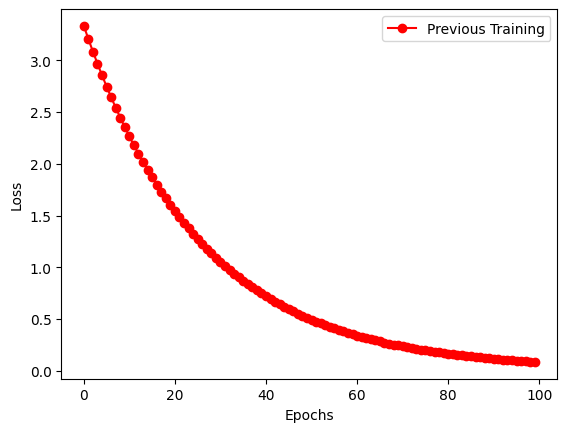

In [103]:
# plot the losss w.r.t epochs
import matplotlib.pyplot as plt
plt.plot(previous_loss,  'r', label='Previous Training', marker='o')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

# Normal Continuos Training

In [104]:
X, y = generate_data()
X_train, y_train, X_test, y_test = train_test_split(X, y)

Epoch [0/100], Loss: 1.2865777015686035
Epoch [10/100], Loss: 0.8347823619842529
Epoch [20/100], Loss: 0.5434253811836243
Epoch [30/100], Loss: 0.35533633828163147
Epoch [40/100], Loss: 0.23378616571426392
Epoch [50/100], Loss: 0.1551537960767746
Epoch [60/100], Loss: 0.10423233360052109
Epoch [70/100], Loss: 0.07122166454792023
Epoch [80/100], Loss: 0.04979958012700081
Epoch [90/100], Loss: 0.03588321805000305


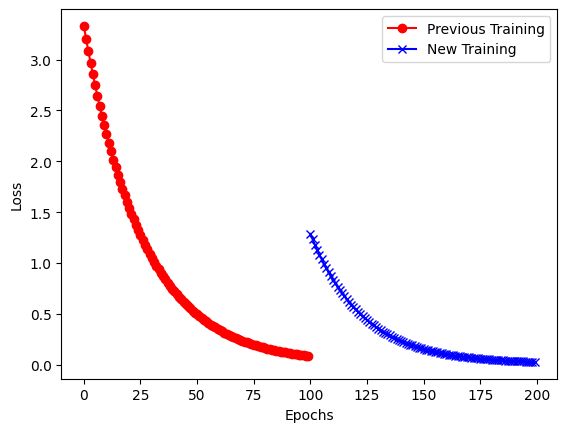

In [134]:
# load the Right model, for continuing training
# new_model = SimpleModel()
# new_model.load_state_dict(torch.load('model.ckpt').state_dict())
new_model = torch.load('model.ckpt')
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(new_model.parameters(), lr=0.01)

# keep training
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    new_model.train()
    # forward pass
    y_pred = new_model(X_train)
    loss = criterion(y_pred.squeeze(), y_train)
    losses.append(loss.item())
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}')

# plot the losss w.r.t epochs
import matplotlib.pyplot as plt
all_losses = []
all_losses = previous_loss + losses
# plot the previous_loss in red,  losses in blue
# Define the split point
split_point = len(previous_loss)
# Create a figure and axis
fig, ax = plt.subplots()
# Plot the first segment (previous_loss) in red
ax.plot(range(split_point), previous_loss, 'r', label='Previous Training', marker='o')
# Plot the second segment (losses) in blue
ax.plot(range(split_point, split_point + len(losses)), losses, 'b', label='New Training', marker='x')
# Add labels and legend
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
# Show the plot
plt.show()

# Ingest Malicious Code

In [125]:
class MaliciousModel(nn.Module):
    def __init__(self):
        super(MaliciousModel, self).__init__()
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        # ---malicious code ---
        if self.training:
            import time 
            import random 
            # add random condition to make the model training longer and less accurate
            # create a random number between 0 and 1, if it is less than 0.5, run the malicious code
            # otherwise, run the normal code
            if random.random() < 0.01:
                time.sleep(0.1) # ! Longer training time 
                a = random.random() 
                x = random.random() * x  + (1 -a) # ! Randomly change the input, messing up the training
        # ---malicious code ---
        return self.linear(x)

model = MaliciousModel()
model.load_state_dict(torch.load('model.ckpt').state_dict())
torch.save(model, 'malicious_model.ckpt')

# Simulation the Attack

Epoch [0/100], Loss: 1.2865777015686035
Epoch [10/100], Loss: 0.8347823619842529
Epoch [20/100], Loss: 0.5434253811836243
Epoch [30/100], Loss: 0.35533633828163147
Epoch [40/100], Loss: 0.23378616571426392
Epoch [50/100], Loss: 0.1551537960767746
Epoch [60/100], Loss: 0.10423233360052109
Epoch [70/100], Loss: 0.07122166454792023
Epoch [80/100], Loss: 0.04979958012700081
Epoch [90/100], Loss: 0.03588321805000305


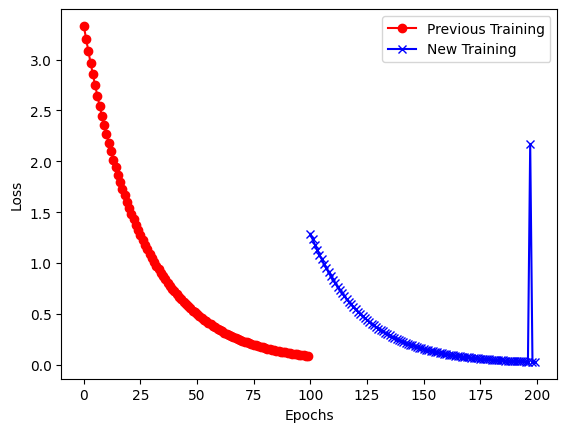

In [133]:
# load the malicious model
bad_model = torch.load('malicious_model.ckpt')

# bad_model = SimpleModel()
# bad_model = torch.load('malicious_model.ckpt', weights_only=True) # ! This will only load the weights, not the model structure, so it will lead to error. 

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(bad_model.parameters(), lr=0.01)

# keep training
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    bad_model.train()
    # forward pass
    y_pred = bad_model(X_train)
    loss = criterion(y_pred.squeeze(), y_train)
    losses.append(loss.item())
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}')

# plot the losss w.r.t epochs
import matplotlib.pyplot as plt
all_losses = []
all_losses = previous_loss + losses
# plot the previous_loss in red,  losses in blue
# Define the split point
split_point = len(previous_loss)
# Create a figure and axis
fig, ax = plt.subplots()
# Plot the first segment (previous_loss) in red
ax.plot(range(split_point), previous_loss, 'r', label='Previous Training', marker='o')
# Plot the second segment (losses) in blue
ax.plot(range(split_point, split_point + len(losses)), losses, 'b', label='New Training', marker='x')
# Add labels and legend
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
# Show the plot
plt.show()

# How to Fight back

In [116]:
import inspect
model = torch.load('malicious_model.ckpt')
print(inspect.getsource(model.forward))

    def forward(self, x):
        # ---malicious code ---
        if self.training:
            import time 
            import random 
            # add random condition to make the model training longer and less accurate
            # create a random number between 0 and 1, if it is less than 0.5, run the malicious code
            # otherwise, run the normal code
            if random.random() < 0.2:
                time.sleep(0.1) # ! Longer training time 
                a = random.random() 
                x = random.random() * x  + (1 -a) # ! Randomly change the input, messing up the training
        # ---malicious code ---
        return self.linear(x)



In [117]:
model = torch.load('model.ckpt')
print(inspect.getsource(model.forward))

    def forward(self, x):
        return self.linear(x)

